<a href="https://colab.research.google.com/github/Tanveer132/Classfication-Types-in-Machine-Learning/blob/main/FST_Practice_Logistic_Regression(Bi_Multi_HyperTunning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression for Binomial labels

data - diabetes data

Simple logistic regression

model=LogisticRegression()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
df1=pd.read_csv('/content/diabetes.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


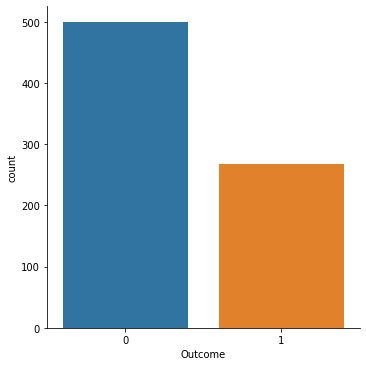

In [7]:
sns.catplot(df1['Outcome'],data=df1,kind='count')

**Conclusion :** Two classes in labels column. we will perform Simple Logistic Regression

In [8]:
#Split data

x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
#Build model and fit

model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
#Demonstrate actual and predicted values

pd.DataFrame({"actual":ytest,"prediction":ypred}).head()

,actual,prediction
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0


Accuracy : 0.8246753246753247
Report :
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



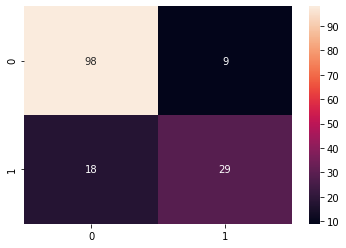

In [15]:
#Calulate accuracy, calssification report and confusion matrix

print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)

**Conclusion :** Simple Logistic Regression performed on data. accuracy found to be 0.8246753246753247

#Logistic Regression for Multinomial labels

data - iris data

model=LogisticRegression(multi_class="multinomial")

In [16]:
df2=pd.read_csv('/content/iris.csv')
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df2.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


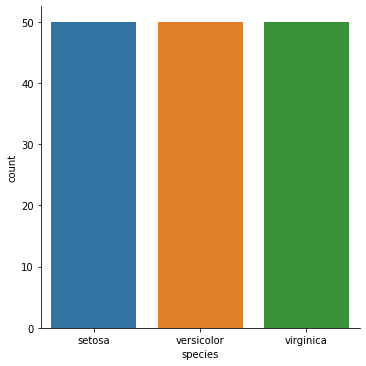

In [20]:
sns.catplot(df2['species'],data=df2,kind='count')

**Conclusion :** Three classes in labels column. we will perform Logistic Regression for multiple classes

In [21]:
#encode labels 
le=LabelEncoder()
df2['species']=le.fit_transform(df2['species'])

In [26]:
#Split data

x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
#Build model and fit

model=LogisticRegression(multi_class='multinomial')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
#Demonstrate actual and predicted values

pd.DataFrame({"actual":ytest,"prediction":ypred}).head()

,actual,prediction
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


Accuracy : 1.0
Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



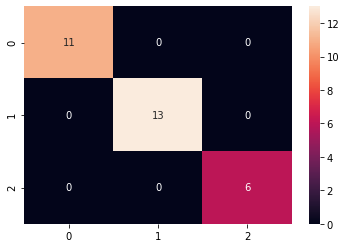

In [29]:
#Calulate accuracy, calssification report and confusion matrix

print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)

#Hyper parameter tunning in Logistic Regression

grid_cv=GridSearchCV(estimator,param_grid,cv,scoring="accuracy")

res=grid_cv.fit(x,y)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

estimator---> model to be used

param_grid--> solver,panalty,c

cv(cross validator)-->kfold

- - - - - - - - -

to get score of the best fitted model--> res.best_score_

to get parameters of the best fitted model--> res.best_params_


In [ ]:
help(LogisticRegression)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

Logistic Regression - Tunning parameters extracted from documentations

    penalty : {'l1', 'l2', 'elasticnet', 'none'}, default='l2'

    solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag','saga'}

    C : [100,10,1,0.1,0.01,0.001]



In [47]:
# estimator---> model to be used
model=LogisticRegression()

# param_grid--> solver,panalty,c
param={"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],
      "penalty":['l1', 'l2', 'elasticnet', 'none'],
      "multi_class" : ['auto', 'ovr', 'multinomial'],
      "C":[100,10,1,0.1,0.01,0.001]}

# cv(cross validator)-->kfold
#n_repeats=3/5/10, n_splits is always 10
kfold=RepeatedStratifiedKFold(n_repeats=3,n_splits=10,random_state=1)



In [ ]:
#Provide-->estimator=model,grid=parameters extracted,cv=cross validator,scoring='accuracy'
grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=kfold,scoring='accuracy')
result=grid_cv.fit(xtrain,ytrain)


In [49]:
print(result.best_score_)
print(result.best_params_)

0.975
{'C': 1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag'}


In [52]:
#Tunned parameters are:
# {'C': 1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag'}

model=LogisticRegression(C= 1, multi_class= 'auto', penalty= 'l2', solver= 'sag')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [53]:
#Demonstrate actual and predicted values

pd.DataFrame({"actual":ytest,"prediction":ypred}).head()

,actual,prediction
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


Accuracy : 1.0
Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



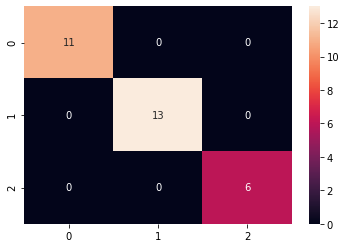

In [54]:
#Calulate accuracy, calssification report and confusion matrix

print("Accuracy :", accuracy_score(ytest,ypred))
print("Report :\n",classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(data=cm,annot=True)